## WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import logging
import math

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

lat_lngs

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
city = cities


query_url = f"{base_url}appid={weather_api_key}&q={city}&units=imperial"

# Get weather data
#weather_response = requests.get(query_url).json()


In [6]:
cities_results = []

#Conversion of Kelvin to Fahrenheit


for index,city in enumerate(cities):
    
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{base_url}appid={weather_api_key}&q={city}&units=imperial"

    print(f'found {city}')
          
    try:
        # Get weather data
        weather_response = requests.get(query_url).json()
        lon=weather_response["coord"]["lon"]
        lat=weather_response["coord"]["lat"]
        cities_results.append(weather_response)
        
        
    except:
        print(f"No City Data Found for {city}")

         
    
         




found avarua
found rikitea
found faanui
found chokurdakh
found smithers
found dabeiba
found olafsvik
found nikolskoye
found college
found nanortalik
found namibe
found jati
found lavrentiya
found east london
found iqaluit
found ontario
found butaritari
found vreed en hoop
No City Data Found for vreed en hoop
found vaini
found bourail
found kapaa
found ahipara
found ayagoz
found zhuanghe
found cabo san lucas
found cayenne
found wamba
found kologriv
found mercedes
found taolanaro
No City Data Found for taolanaro
found maumere
found hithadhoo
found sukhoverkovo
No City Data Found for sukhoverkovo
found torbay
found ulety
found samusu
No City Data Found for samusu
found new norfolk
found hermanus
found ushuaia
found vanavara
found souillac
found itupiranga
found cherskiy
found punta arenas
found ossora
found hobart
found nanlong
found constitucion
found cabildo
found sansepolcro
found hilo
found mount isa
found auki
found jamestown
found mar del plata
found takoradi
found port hardy
found 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
len(cities_results)

574

In [8]:
city_data = []
for i,city in enumerate(cities_results):
    cityname = city["name"]
    citytemp = city["main"]["temp"]
    citymtemp = city["main"]["temp_max"]
    citylat = city["coord"]["lat"]
    cityhum = city["main"]["humidity"]
    citycloud = city["clouds"]["all"]
    citywind = city["wind"]["speed"]
    city_data.append(
        {"City": cityname,
        "Temperature": citytemp,
        "Max Temp": citymtemp,
        "Latitude": citylat,
        "Humidity %" : cityhum,
        "Cloudiness %" : citycloud,
        "Wind Speed" : citywind
        })


In [9]:
cities_res_df = pd.DataFrame(city_data)

In [10]:
cities_res_df

,City,Temperature,Max Temp,Latitude,Humidity %,Cloudiness %,Wind Speed
0,Avarua,69.80,69.80,-21.21,94,100,2.24
1,Rikitea,76.77,76.77,-23.12,78,6,22.50
2,Faanui,80.20,80.20,-16.48,71,60,5.82
3,Chokurdakh,-17.75,-17.75,70.63,89,68,9.69
4,Smithers,28.40,28.40,54.78,92,90,2.24
...,...,...,...,...,...,...,...
569,Porangatu,91.08,91.08,-13.44,49,51,3.06
570,San Policarpo,81.61,81.61,12.18,83,100,16.33
571,Agustin Codazzi,93.24,93.24,10.03,34,46,4.25
572,San Cristobal,84.20,84.20,7.77,54,40,5.82


cities_res_df

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.

'100' in cities_res_df.values




False

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [13]:
N/A


NameError: name 'N' is not defined

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

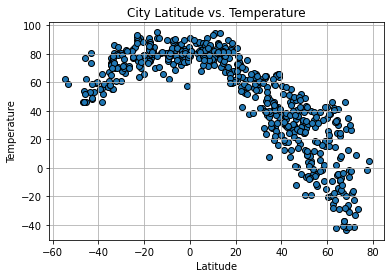

AttributeError: module 'matplotlib.pyplot' has no attribute 'savefig1'

In [107]:
#Scatterplot showing the Latitude vs. Temperature

latitude = cities_res_df.iloc[:,3]
temperature = cities_res_df.iloc[:,1]
edgecolors = ['black']
plt.scatter(latitude, temperature, edgecolors=edgecolors)
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(b=True)
plt.show()



This Scatter Plot shows that the temperatures on this day indicate cities in the Northern Hemisphere are warmer. 

## Latitude vs. Humidity Plot

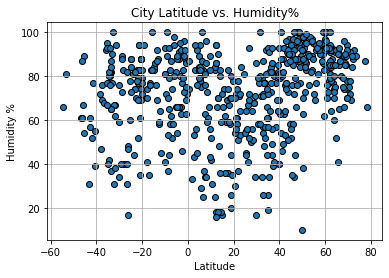

In [57]:
latitude = cities_res_df.iloc[:,3]
humidity = cities_res_df.iloc[:,4]
edgecolors = ['black']
plt.scatter(latitude, humidity, edgecolors=edgecolors)
plt.title("City Latitude vs. Humidity %")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(b=True)
plt.show()

This Scatter Plot measures the the city's Latitude from the Equator/Prime Meridian relative to Humidity

## Latitude vs. Cloudiness Plot

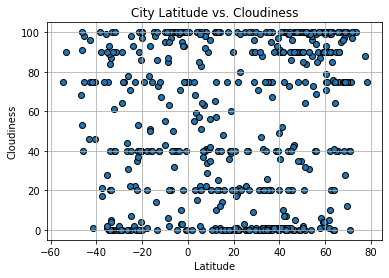

In [58]:
latitude = cities_res_df['Latitude']
cloudiness = cities_res_df['Cloudiness %']
edgecolors = ['black']
plt.scatter(latitude, cloudiness, edgecolors=edgecolors)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(b=True)
plt.show()

This Scatter Plot show that Cloudiness appear equal relative to Latitude 

## Latitude vs. Wind Speed Plot

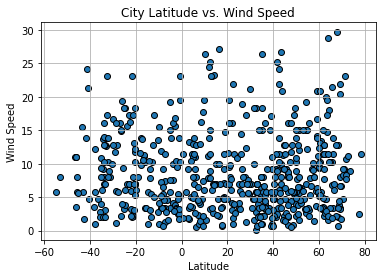

In [59]:
latitude = cities_res_df['Latitude']
windspeed = cities_res_df['Wind Speed']
edgecolors = ['black']
plt.scatter(latitude, windspeed, edgecolors=edgecolors)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(b=True)
plt.show()

This Scatter Plot appers to indicate that Cities Latitude does not have a correlation to Wind Speed

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

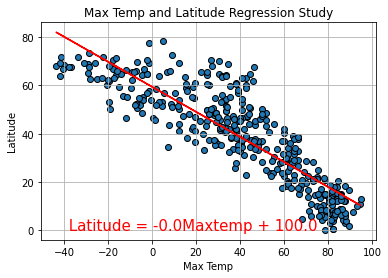

In [77]:
maxtemp = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Max Temp']
northlat = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(maxtemp, northlat)
regress_values = maxtemp * slope + intercept
line_eq = " Latitude = " + str(round(slope,-2)) + "Maxtemp + " + str(round(intercept,-2))
plt.scatter(maxtemp, northlat, edgecolors=edgecolors)
plt.plot(maxtemp,regress_values,"r-")
plt.annotate(line_eq,(-40,-0),fontsize=15,color="red"),
plt.title("Max Temp and Latitude Regression Study")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

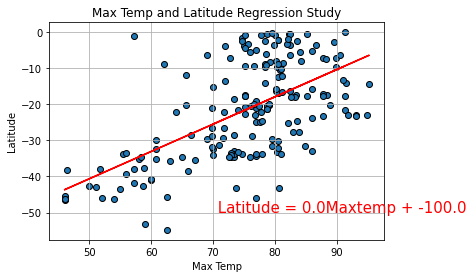

In [88]:
maxtemp = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Max Temp']
southlat = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(maxtemp, southlat)
regress_values = maxtemp * slope + intercept
line_eq = " Latitude = " + str(round(slope,-2)) + "Maxtemp + " + str(round(intercept,-2))
plt.scatter(maxtemp, southlat, edgecolors=edgecolors)
plt.plot(maxtemp,regress_values,"r-")
plt.annotate(line_eq,(70,-50),fontsize=15,color="red"),
plt.title("Max Temp and Latitude Regression Study")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

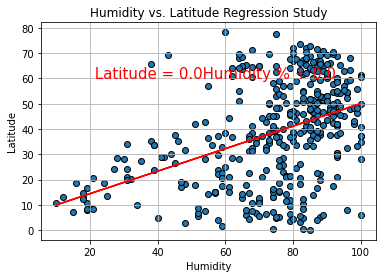

In [94]:
humidity = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Humidity %']
northlat = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(humidity, northlat)
regress_values = humidity * slope + intercept
line_eq = " Latitude = " + str(round(slope,-2)) + "Humidity % + " + str(round(intercept,-2))
plt.scatter(humidity, northlat, edgecolors=edgecolors)
plt.plot(humidity,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red"),
plt.title("Humidity vs. Latitude Regression Study")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

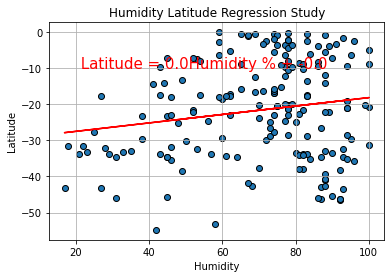

In [98]:
humidity = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Humidity %']
southlat = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(humidity, southlat)
regress_values = humidity * slope + intercept
line_eq = " Latitude = " + str(round(slope,-2)) + "Humidity % + " + str(round(intercept,-2))
plt.scatter(humidity, southlat, edgecolors=edgecolors)
plt.plot(humidity,regress_values,"r-")
plt.annotate(line_eq,(20,-10),fontsize=15,color="red"),
plt.title("Humidity vs. Latitude Regression Study")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

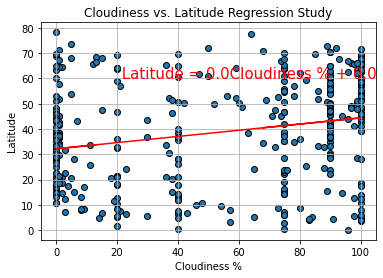

In [99]:
cloudiness = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Cloudiness %']
northlat = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(cloudiness, northlat)
regress_values = cloudiness * slope + intercept
line_eq = " Latitude = " + str(round(slope,-2)) + "Cloudiness % + " + str(round(intercept,-2))
plt.scatter(cloudiness, northlat, edgecolors=edgecolors)
plt.plot(cloudiness,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red"),
plt.title("Cloudiness vs. Latitude Regression Study")
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

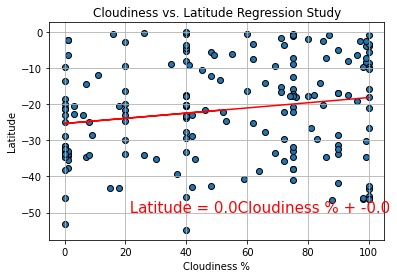

In [102]:
cloudiness = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Cloudiness %']
southlat = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(cloudiness, southlat)
regress_values = cloudiness * slope + intercept
line_eq = " Latitude = " + str(round(slope,-2)) + "Cloudiness % + " + str(round(intercept,-2))
plt.scatter(cloudiness, southlat, edgecolors=edgecolors)
plt.plot(cloudiness,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red"),
plt.title("Cloudiness vs. Latitude Regression Study")
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

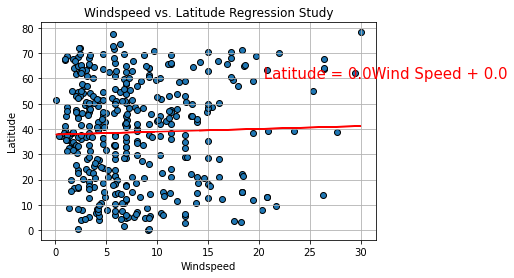

In [103]:
windspeed = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Wind Speed']
northlat = cities_res_df.loc[cities_res_df["Latitude"] >= 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(windspeed, northlat)
regress_values = windspeed * slope + intercept
line_eq = " Latitude = " + str(round(slope,-2)) + "Wind Speed + " + str(round(intercept,-2))
plt.scatter(windspeed, northlat, edgecolors=edgecolors)
plt.plot(windspeed,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red"),
plt.title("Windspeed vs. Latitude Regression Study")
plt.xlabel("Windspeed")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

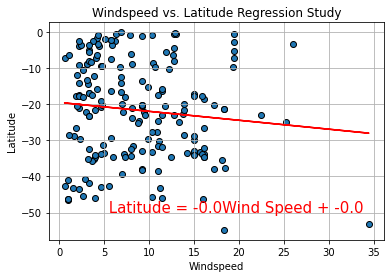

In [105]:
windspeed = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Wind Speed']
southlat = cities_res_df.loc[cities_res_df["Latitude"] < 0.0]['Latitude']
edgecolors = ['black']
(slope, intercept, rvalue, pvalue, stderr) = linregress(windspeed, southlat)
regress_values = windspeed * slope + intercept
line_eq = " Latitude = " + str(round(slope,-2)) + "Wind Speed + " + str(round(intercept,-2))
plt.scatter(windspeed, southlat, edgecolors=edgecolors)
plt.plot(windspeed,regress_values,"r-")
plt.annotate(line_eq,(5, -50),fontsize=15,color="red"),
plt.title("Windspeed vs. Latitude Regression Study")
plt.xlabel("Windspeed")
plt.ylabel("Latitude")
plt.grid(b=True)
plt.show()
plt.show()